Customer shopping dataset is having all the details of shopping of customers. Analysing the dataset will get information about the purchase and future possibilty of purchase. Identifying the age group of people who are doing the shopping and category of purchase, payment mode etc



#Importing all Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


#Loading the dataset

In [2]:
data = pd.read_csv('shopping_trends_updated.csv')
data.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


1.Sum of amount purchased by both male and female
2.How many of them used coupon code
3. How many of them used promo code
4. Each category least and high rating
5. People who have subscription got free shipping for all item or not
6. Which category of item are shipped next day air
7. Total sum of item purchased for each category
8.Total sum for each gender
9. Total sum for each country.
10. Season wise purchase amount sum
11. Age wise purchase history and their total

##Information about the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

##Descriptive statictics

In [4]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [5]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

##Checking the duplicated available in the dataset

In [6]:
data.duplicated().sum()

0

#Data Analysis

Text(0.5, 1.0, 'Total count of Gender')

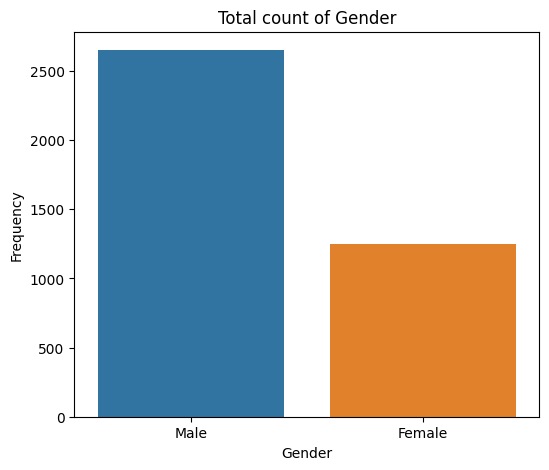

In [7]:
plt.figure(figsize = (6,5))
sns.countplot(data = data,x = 'Gender')
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Total count of Gender")

Plot show the more count for male are frequently doing purchase


Text(0.5, 1.0, 'Distribution of Ages')

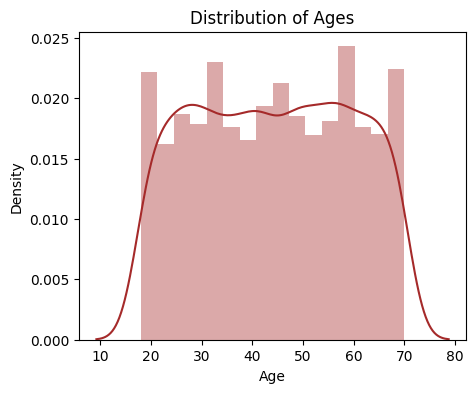

In [8]:
plt.figure(figsize=(5,4))
sns.distplot(data['Age'],color = 'Brown')
plt.title("Distribution of Ages")


People above 18-70 years are doing the shopping

In [9]:
for col in data.columns:
    print(data[col].value_counts())



1       1
2621    1
2593    1
2594    1
2595    1
       ..
1305    1
1306    1
1307    1
1308    1
3900    1
Name: Customer ID, Length: 3900, dtype: int64
69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: Age, dtype: int64
Male      2652
Female    1248
Name: Gender, dtype: int64
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           15

In [10]:
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

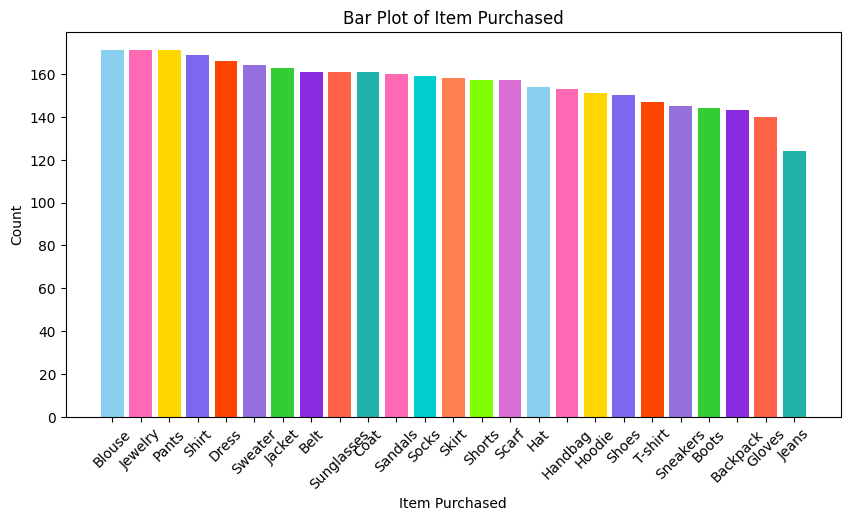

In [11]:
item_counts = data['Item Purchased'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(item_counts.index, item_counts, color=colors)
plt.xlabel('Item Purchased')
plt.ylabel('Count')
plt.title('Bar Plot of Item Purchased')
plt.xticks(rotation=45)
plt.show()

Though female shopping counts are less but the more number of item which is purchased was blouse and accessories

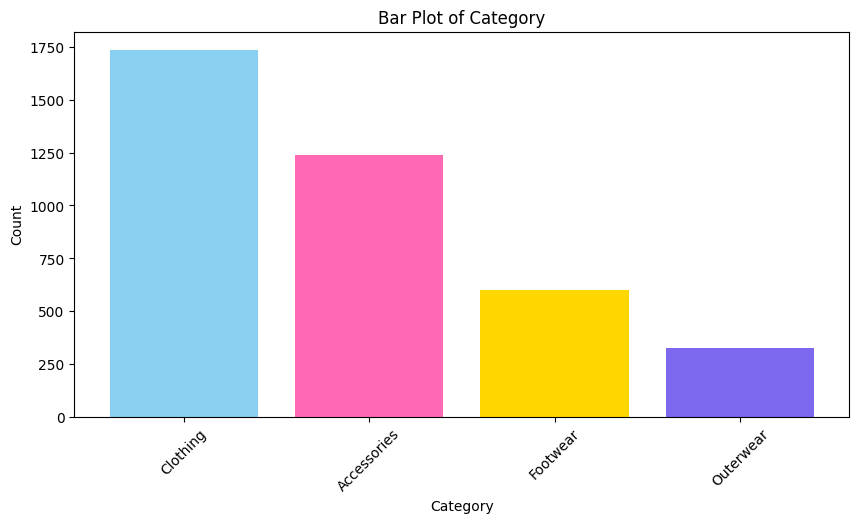

In [12]:
category_counts = data['Category'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(category_counts.index, category_counts, color=colors)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Plot of Category')
plt.xticks(rotation=45)
plt.show()

They are four category of shopping in the dataset out of four clothing and accessories are high in quantity people prefer to buy more cloths and accessories. Footwaer and outerwear importance are quite less

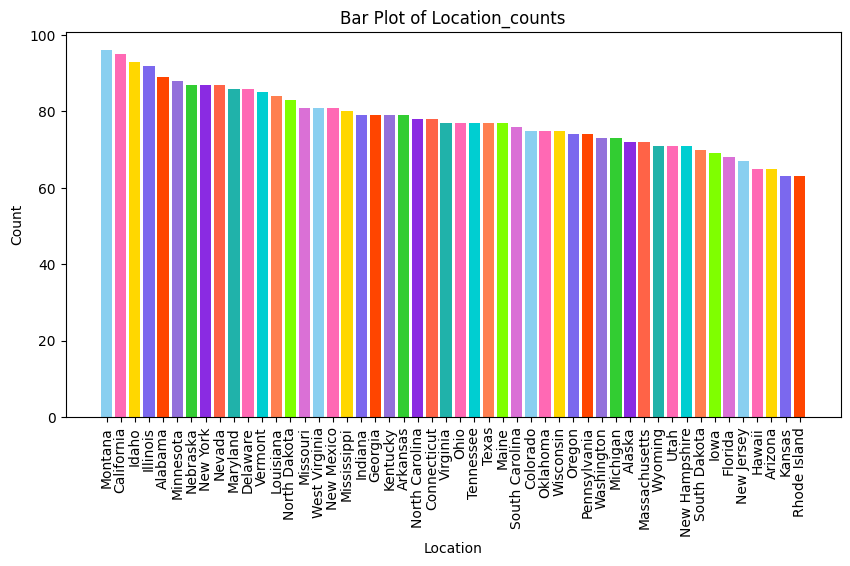

In [13]:
Location_counts = data['Location'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(Location_counts.index, Location_counts, color=colors)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Bar Plot of Location_counts')
plt.xticks(rotation=90)
plt.show()

Top five countries who placed more orders are montana, california, idaho, ilinois, alabama .

Text(0.5, 1.0, 'Count of Subscription Status')

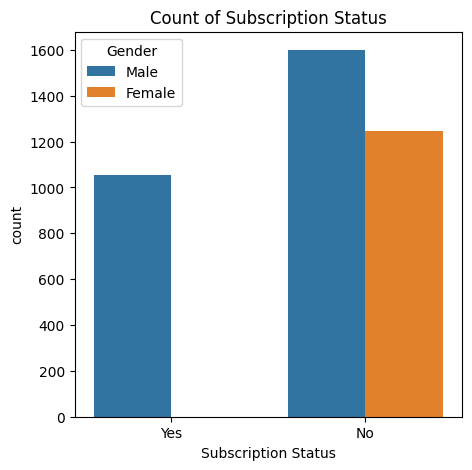

In [14]:
plt.figure(figsize = (5,5))
sns.countplot(data = data , x= data['Subscription Status'],hue='Gender')
plt.title("Count of Subscription Status")

Most number of people dont have subscription to the site. 1:3 percentage people have subscription. Mostly subscription are there in male name.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Venmo'),
  Text(1, 0, 'Cash'),
  Text(2, 0, 'Credit Card'),
  Text(3, 0, 'PayPal'),
  Text(4, 0, 'Bank Transfer'),
  Text(5, 0, 'Debit Card')])

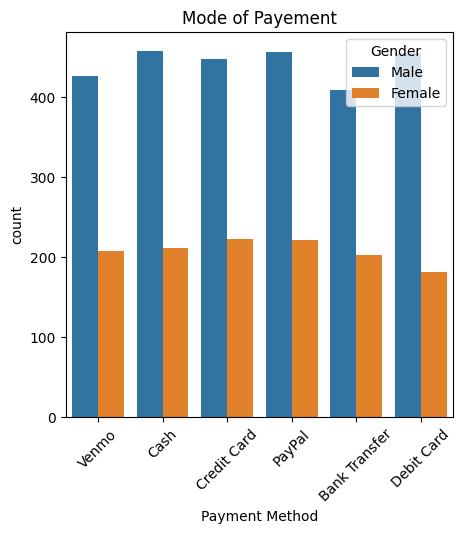

In [15]:
plt.figure(figsize = (5,5))
sns.countplot(data = data , x= data['Payment Method'],hue='Gender')
plt.title("Mode of Payement")
plt.xticks(rotation = 45)

Purchase are done in all mode of payment both male and female participation are there in placing the order through online as well as cash.

Text(0.5, 1.0, 'Count of product size')

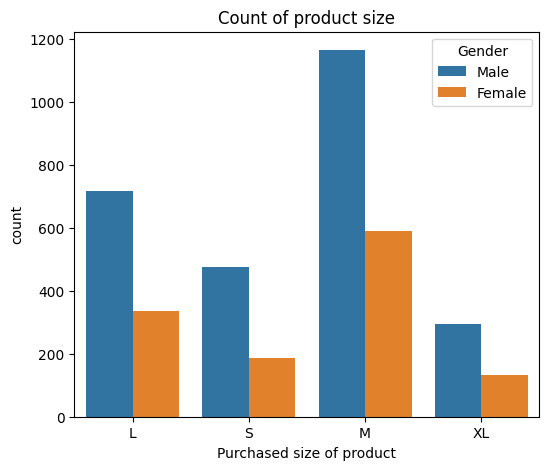

In [16]:
plt.figure(figsize=(6,5))
sns.countplot(data=data, x = 'Size',hue = 'Gender')
plt.xlabel("Purchased size of product")
plt.title('Count of product size')

People mostly in the medium size which includes both male and female.

In [17]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

Text(0.5, 1.0, 'Frequency of Purchases')

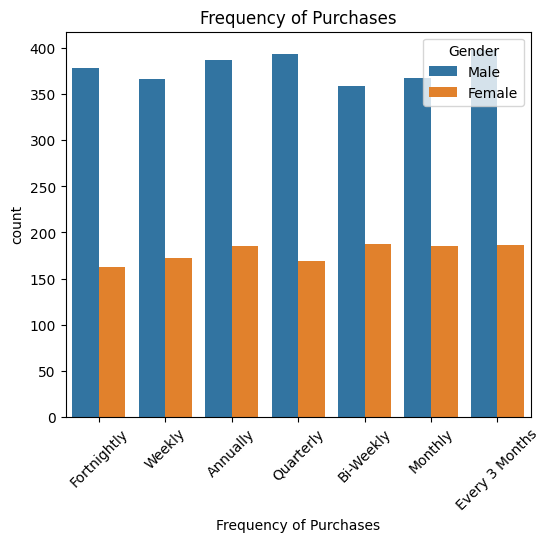

In [18]:
plt.figure(figsize=(6,5))
sns.countplot(data=data, x = 'Frequency of Purchases',hue = 'Gender')
plt.xticks(rotation = 45)
plt.title('Frequency of Purchases')

Text(0.5, 1.0, 'Preferences of color')

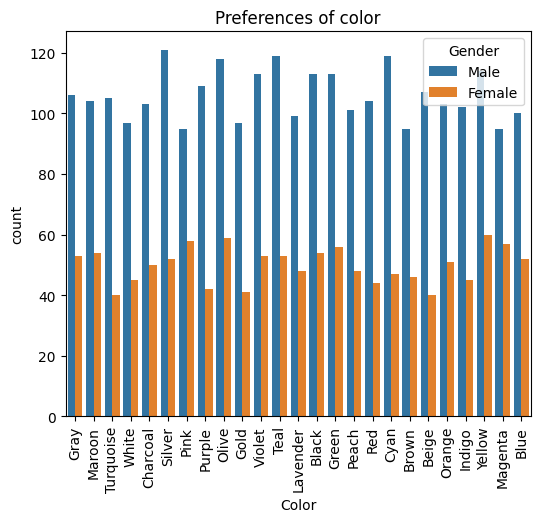

In [19]:
plt.figure(figsize=(6,5))
sns.countplot(data=data, x = 'Color',hue = 'Gender')
plt.xticks(rotation = 90)
plt.title('Preferences of color')

Text(0.5, 1.0, 'Count of Promo code used people')

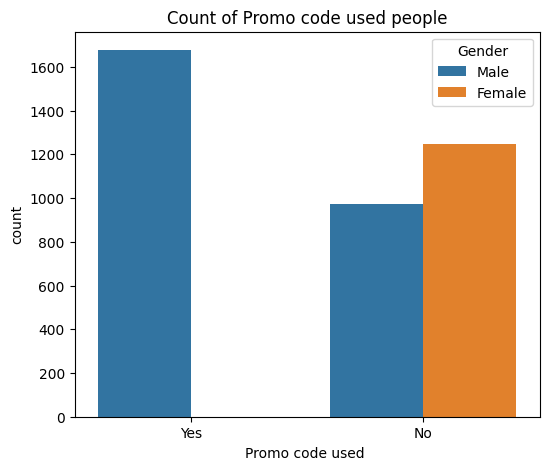

In [20]:
plt.figure(figsize=(6,5))
sns.countplot(data=data, x = 'Promo Code Used',hue = 'Gender')
plt.xlabel("Promo code used ")
plt.title('Count of Promo code used people')

Customer who used promo code is mostly male , Female are not using the promo code

Text(0.5, 1.0, 'Seasonsal purchase ')

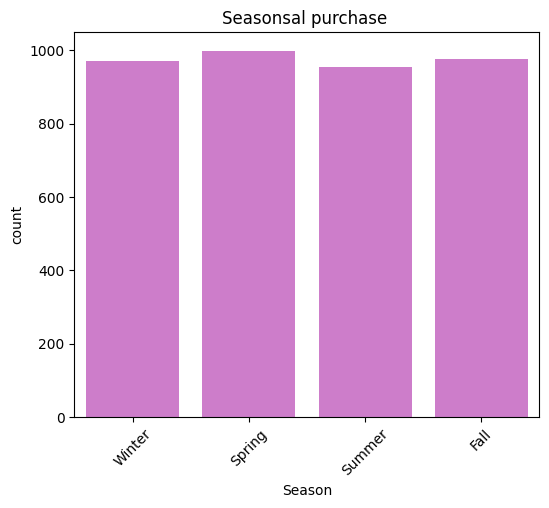

In [21]:
plt.figure(figsize=(6,5))
sns.countplot(data=data, x = 'Season',color = "#DA70D6")
plt.xticks(rotation = 45)
plt.title('Seasonsal purchase ')

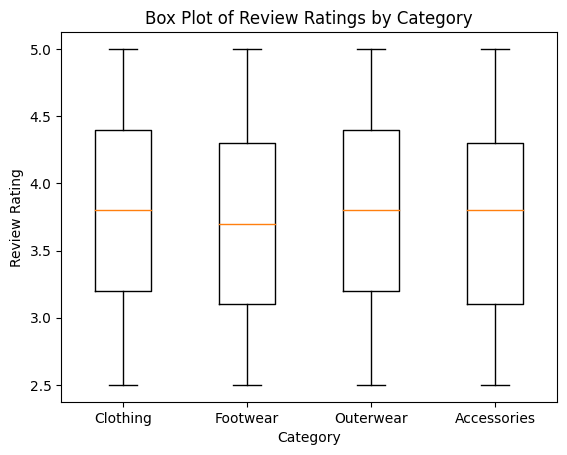

In [22]:
plt.boxplot(data.groupby('Category')['Review Rating'].apply(list), labels=data['Category'].unique())
plt.xlabel('Category')
plt.ylabel('Review Rating')
plt.title('Box Plot of Review Ratings by Category')
plt.show()

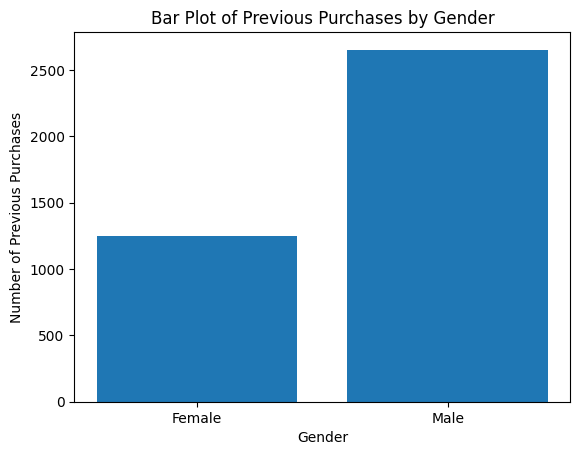

In [23]:
purchase_counts = data.groupby('Gender')['Previous Purchases'].count()

gender_labels = purchase_counts.index

plt.bar(gender_labels, purchase_counts)
plt.xlabel('Gender')
plt.ylabel('Number of Previous Purchases')
plt.title('Bar Plot of Previous Purchases by Gender')
plt.show()


 *Sum of amount purchased by both male and female*




In [24]:
# Here we all know total quantity of female persons purchase is less let see the amount of purchase they made.
data_Gender = data.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()
data_Gender


,Gender,Purchase Amount (USD)
0,Female,75191
1,Male,157890


The ratio of male and female quantity is less so purchase amount also less for female lets check total sum of the purchase amount for category as well as its type

In [25]:
data_Item = data.groupby('Category')['Purchase Amount (USD)'].sum().reset_index()
data_Item.sort_values(by='Purchase Amount (USD)', ascending=False)

,Category,Purchase Amount (USD)
1,Clothing,104264
0,Accessories,74200
2,Footwear,36093
3,Outerwear,18524


In [26]:
data_category = data.groupby('Item Purchased')['Purchase Amount (USD)'].sum().reset_index()
data_category = data_category.sort_values(by='Purchase Amount (USD)', ascending=False)
data_category

,Item Purchased,Purchase Amount (USD)
2,Blouse,10410
16,Shirt,10332
5,Dress,10320
13,Pants,10090
12,Jewelry,10010
22,Sunglasses,9649
1,Belt,9635
15,Scarf,9561
23,Sweater,9462
18,Shorts,9433


         Location  Purchase Amount (USD)
25        Montana                   5784
12       Illinois                   5617
4      California                   5605
11          Idaho                   5587
27         Nevada                   5514
0         Alabama                   5261
31       New York                   5257
33   North Dakota                   5220
47  West Virginia                   5174
26       Nebraska                   5172


Text(0.5, 1.0, 'purchase amount for top 10 location')

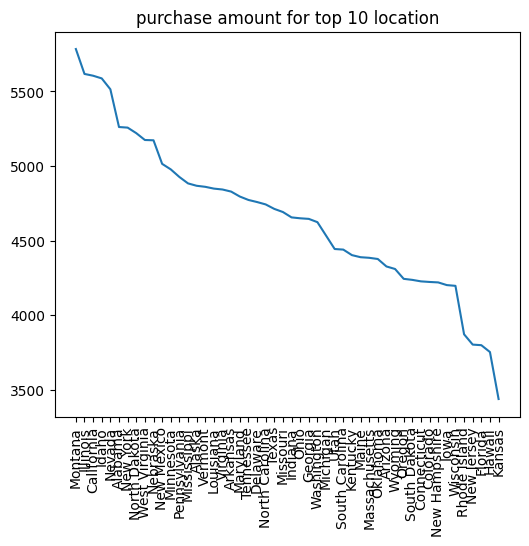

In [27]:
data_location = data.groupby('Location')['Purchase Amount (USD)'].sum().reset_index()
data_location = data_location.sort_values(by='Purchase Amount (USD)', ascending=False)
print(data_location.head(10))
plt.figure(figsize = (6,5))
plt.plot(data_location['Location'],data_location['Purchase Amount (USD)'])
plt.xticks(rotation = 90)
plt.title("purchase amount for top 10 location")

In [28]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

##Rating for each category

In [29]:
rating_category =  data.groupby('Category')['Review Rating'].min().reset_index()
rating_category

,Category,Review Rating
0,Accessories,2.5
1,Clothing,2.5
2,Footwear,2.5
3,Outerwear,2.5


In [30]:
rating_max =  data.groupby('Category')['Review Rating'].max().reset_index()
rating_max

,Category,Review Rating
0,Accessories,5.0
1,Clothing,5.0
2,Footwear,5.0
3,Outerwear,5.0


In [31]:
rating_avg =  data.groupby('Category')['Review Rating'].mean().reset_index()
rating_avg

,Category,Review Rating
0,Accessories,3.768629
1,Clothing,3.723143
2,Footwear,3.790651
3,Outerwear,3.746914


All the category have same kind of rating for maximum, minimum, Average

In [32]:
rating_for_each_item = data[['Item Purchased','Review Rating']].where(data['Category']=='Clothing')
rat_item_min = rating_for_each_item.groupby('Item Purchased')['Review Rating'].min().reset_index()
rat_item_max = rating_for_each_item.groupby('Item Purchased')['Review Rating'].max().reset_index()
print(rat_item_max)
print(rat_item_min)

   Item Purchased  Review Rating
0          Blouse            5.0
1           Dress            5.0
2          Hoodie            5.0
3           Jeans            5.0
4           Pants            5.0
5           Shirt            5.0
6          Shorts            5.0
7           Skirt            5.0
8           Socks            5.0
9         Sweater            5.0
10        T-shirt            5.0
   Item Purchased  Review Rating
0          Blouse            2.6
1           Dress            2.5
2          Hoodie            2.5
3           Jeans            2.5
4           Pants            2.5
5           Shirt            2.5
6          Shorts            2.5
7           Skirt            2.5
8           Socks            2.5
9         Sweater            2.5
10        T-shirt            2.5


All clothing item minimum and maximum rating is 2.5 to 5 but for blouse rating is 2.6


##Season wise purchase history


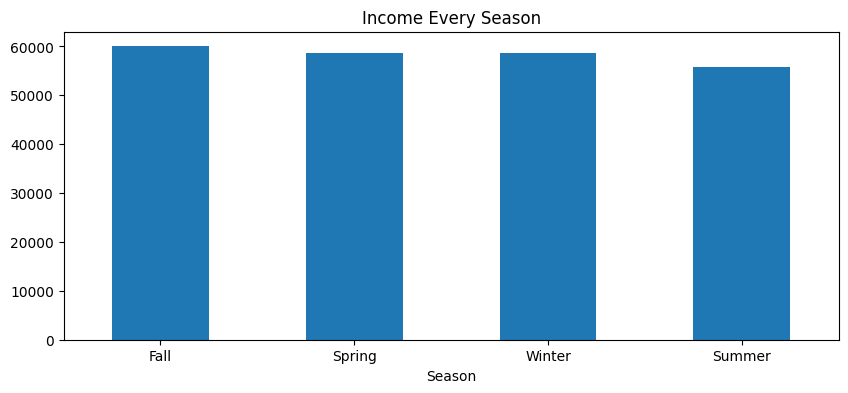

In [33]:
data.groupby('Season')['Purchase Amount (USD)'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,4),title='Income Every Season')

plt.xticks(rotation=0)
plt.show()

Most purchased are done in Fall, Spring and Winter


##Purchase sum for different age group

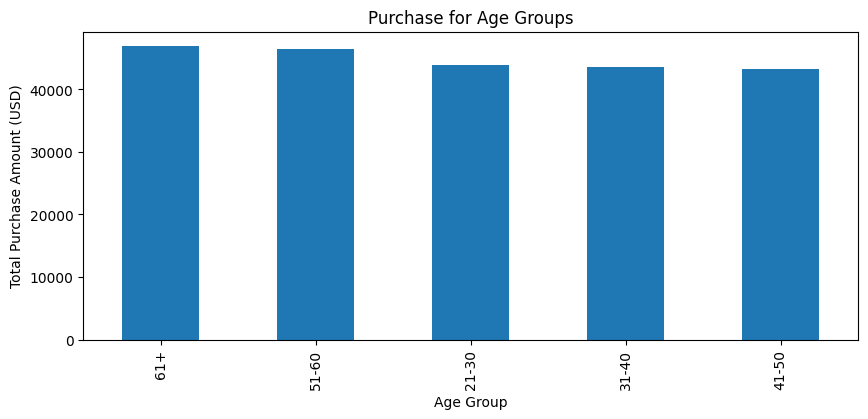

In [39]:
bin_edges = [20, 30, 40, 50, 60, 100]
bin_labels = [ '21-30', '31-40', '41-50', '51-60', '61+']
data['Age Group'] = pd.cut(data['Age'], bins=bin_edges, labels=bin_labels, right=False)
age_group_data = data.groupby('Age Group')['Purchase Amount (USD)'].sum()
age_group_data.sort_values(ascending=False).plot(kind='bar', figsize=(10, 4), title='Purchase for Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

As per age the bins are created and the purchase amount was calculated. The 20-30,61+ and 51-60 age group people are purchased more

##Total number of people who used promo code and discount

In [41]:
discount_promo_count = data[(data[''Discount Applied] == 'Yes') & (data['Promo Code Used'] == 'Yes')]['Customer ID'].count()
print("No of Customers with Discount and Promo Code Used: ", discount_promo_count)

No of Customers with Discount and Promo Code Used:  1677


##Total number of people who used promo code and subscription


In [43]:
subscription_promo_count = data[(data['Subscription Status'] == 'Yes') & (data['Promo Code Used'] == 'Yes')]['Customer ID'].count()
print("No of Customers with Subscription and Promo Code Used: ", subscription_promo_count)

No of Customers with Subscription and Promo Code Used:  1053


##Total number of people who used Discount and subscription

In [44]:
discount_subcription_count = data[(data['Subscription Status'] == 'Yes') & (data['Discount Applied'] == 'Yes')]['Customer ID'].count()
print("No of Customers with Subscription and Dsicount Used: ", discount_subcription_count)

No of Customers with Subscription and Dsicount Used:  1053
